In [58]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf

import create_data
# Requires having perturbations.py from: 
# https://github.com/google-research/google-research/tree/master/perturbations on your path
from create_model import create_model
from data_utils import plot_data_row

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We can generate synthetic data

In [51]:
x, y, x_valid, y_valid = create_data.main(num_samples=5000, num_vals=9, out_dir='./', seed=360)

And visualize rows of the data. The circled numbers are the "Most yellow"

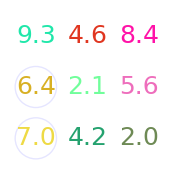

In [52]:
fig = plot_data_row(x[0])

In [54]:
topk_model = create_model(num_vals=9, hidden_sizes=[25, 10], use_topk=True,
                          sigma_perturb=0.05)
shortcut_model = create_model(num_vals=9, hidden_sizes=[25, 10], use_topk=False)
topk_optimizer = tf.optimizers.Adam(learning_rate=0.001)
shortcut_optimizer = tf.optimizers.Adam(learning_rate=0.01)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got partial
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got partial
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [55]:
topk_model.compile(optimizer=topk_optimizer, loss='mse')
shortcut_model.compile(optimizer=shortcut_optimizer, loss='mse')

In [56]:
topk_model.fit(x=x, y=y, epochs=10, batch_size=512,
              validation_data=(x_valid, y_valid))

Epoch 1/10
10/10 [==============================] - 4s 384ms/step - loss: 16.0213 - val_loss: 15.0438
Epoch 2/10
10/10 [==============================] - 4s 384ms/step - loss: 14.8549 - val_loss: 14.4351
Epoch 3/10
10/10 [==============================] - 4s 372ms/step - loss: 14.1438 - val_loss: 13.8377
Epoch 4/10
10/10 [==============================] - 4s 379ms/step - loss: 13.6193 - val_loss: 13.4297
Epoch 5/10
10/10 [==============================] - 4s 382ms/step - loss: 13.2809 - val_loss: 13.1936
Epoch 6/10
10/10 [==============================] - 4s 375ms/step - loss: 13.0075 - val_loss: 12.9539
Epoch 7/10
10/10 [==============================] - 4s 386ms/step - loss: 12.8285 - val_loss: 12.7951
Epoch 8/10
10/10 [==============================] - 4s 377ms/step - loss: 12.6287 - val_loss: 12.6142
Epoch 9/10
10/10 [==============================] - 4s 379ms/step - loss: 12.4621 - val_loss: 12.5251
Epoch 10/10
10/10 [==============================] - 4s 386ms/step - loss: 12.3319

In [57]:
shortcut_model.fit(x=x, y=y, epochs=10, batch_size=512,
              validation_data=(x_valid, y_valid))

Epoch 1/10
10/10 [==============================] - 1s 13ms/step - loss: 46.6814 - val_loss: 22.3648
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 22.3022 - val_loss: 21.3234
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 20.7771 - val_loss: 19.6331
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 20.2386 - val_loss: 19.4064
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 20.1171 - val_loss: 19.5322
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 20.1255 - val_loss: 19.3537
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 19.9886 - val_loss: 19.1759
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 20.0384 - val_loss: 19.2048
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 19.9524 - val_loss: 19.1240
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 19.9000 - val_loss: 19.124